code adapted from [Analyzing Cryptocurrencies in Python](https://youtu.be/HqGlkACB3rg)

## import dependencies

In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import datetime as dt

from yahoo_fin.stock_info import get_data

## Load data

In [2]:
currency = "USD"
metric = "close"

start = dt.datetime(2019, 1, 1)
end = dt.datetime.now()

crypto = ['BTC', 'ETH','USDT','BNB','ADA','DOGE', 'XRP',
          'USDC', 'DOT1','UNI3','BCH', 'LTC','SOL1','LINK',
          'MATIC','XLM','XMR','EOS','CRO','ALGO','AAVE',
          'MIOTA','XTZ','ATOM1']

colnames = []

## Prepare Data

In [3]:
first = True

for ticker in crypto:
    data = get_data(f'{ticker}-{currency}', start, end, index_as_date = True, interval = '1d')
    if first:
        combined = data[[metric]].copy()
        colnames.append(ticker)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(data[metric])
        colnames.append(ticker)
        combined.columns = colnames

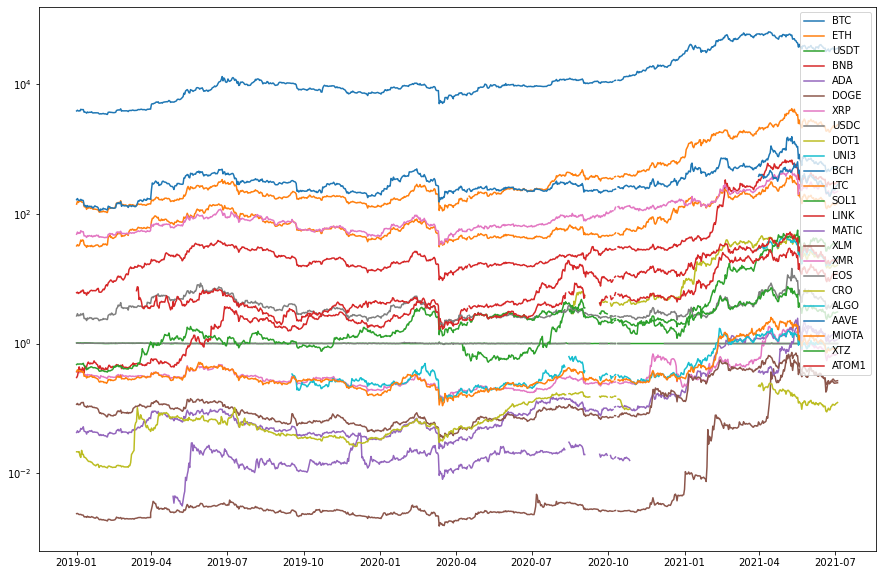

In [4]:
plt.figure(figsize=(15, 10))
plt.yscale('log')

for ticker in crypto:
    plt.plot(combined[ticker], label=ticker)

plt.legend(loc="upper right")
plt.show()

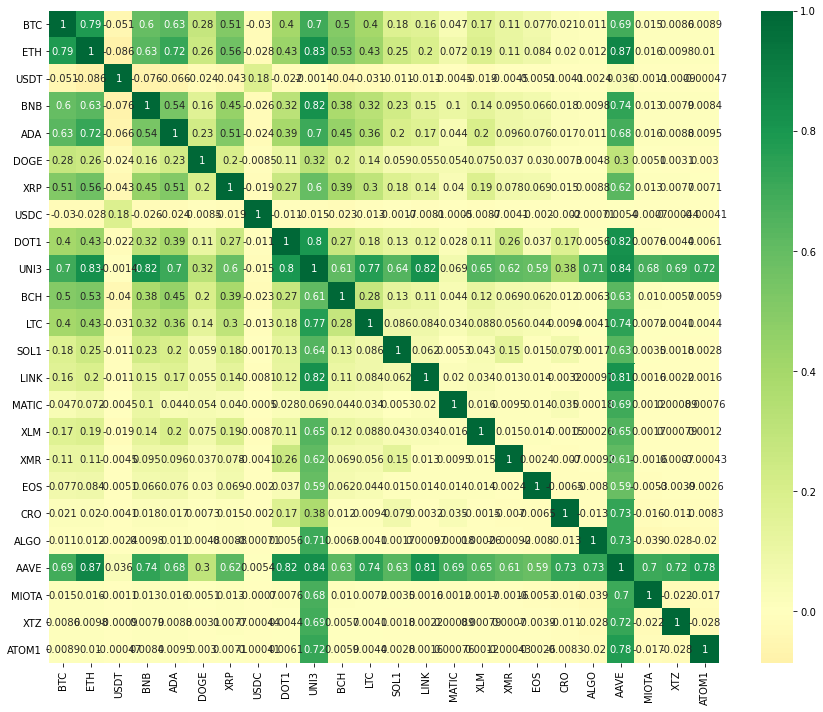

In [5]:
# plot heatmap
combined = combined.pct_change().corr(method="pearson")
fig, ax = plt.subplots(figsize=(15, 12))

sns.heatmap(combined,
            annot=True,
            cmap="RdYlGn",
            #robust=True,
            center=0)
plt.show()